Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Statistics of dataset

In [3]:
gender_counts = train_data["Sex"].value_counts()
gender_counts

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check how many women or male survived

In [19]:
women = train_data.loc[train_data.Sex == "female"]["Survived"]
women_survival_rate = sum(women)/len(women)

men = train_data.loc[train_data.Sex == "male"]["Survived"]
men_survival_rate = sum(men)/len(men)

print("Survival rate for women: ", round(women_survival_rate*100, 2), "%.")
print("Survival rate for men: ", round(men_survival_rate*100, 2), "%.")

Survival rate for women:  74.2 %.
Survival rate for men:  18.89 %.


Check how many passengers survived from each class

In [22]:
first_class = train_data.loc[train_data.Pclass == 1]["Survived"]
second_class = train_data.loc[train_data.Pclass == 2]["Survived"]
third_class = train_data.loc[train_data.Pclass == 3]["Survived"]

first_class_survival_rate = sum(first_class)/len(first_class)
second_class_survival_rate = sum(second_class)/len(second_class)
third_class_survival_rate = sum(third_class)/len(third_class)

print("Survival rate for 1st class: ", round(first_class_survival_rate*100, 2), "%.")
print("Survival rate for 2nd class: ", round(second_class_survival_rate*100, 2), "%.")
print("Survival rate for 3rd class: ", round(third_class_survival_rate*100, 2), "%.")


Survival rate for 1st class:  62.96 %.
Survival rate for 2nd class:  47.28 %.
Survival rate for 3rd class:  24.24 %.


Check how age affects survival rate 

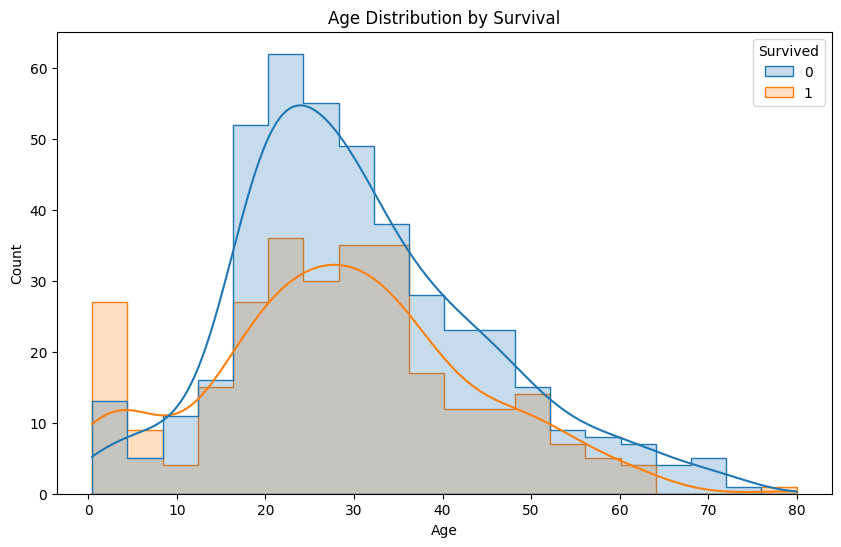

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, element='step')
plt.title('Age Distribution by Survival')
plt.show()

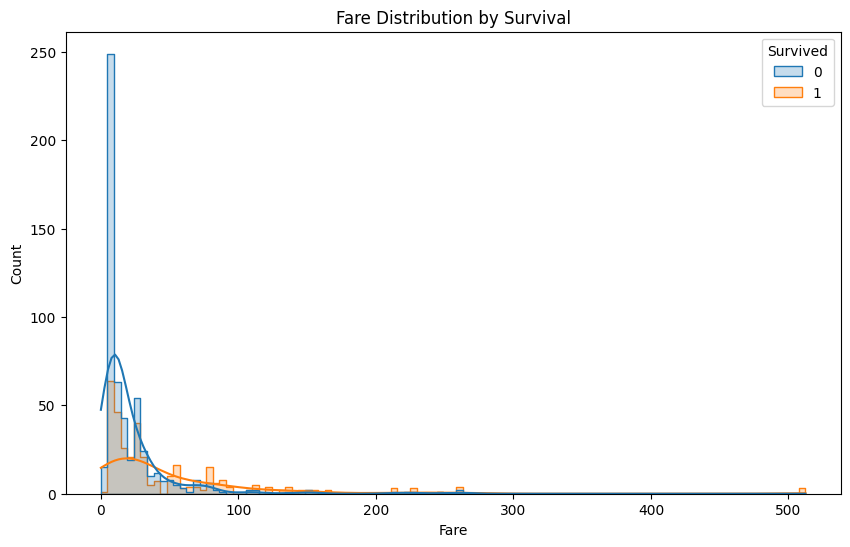

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True, element='step')
plt.title('Fare Distribution by Survival')
plt.show()

Check if staying on cabin affected survival rate

In [19]:
passengers_on_cabin = train_data[train_data['Cabin'].notna()]["Survived"]
survival_rate_on_cabin = sum(passengers_on_cabin)/len(passengers_on_cabin)

passengers_on_deck = train_data[train_data['Cabin'].isna()]["Survived"]
survival_rate_on_deck = sum(passengers_on_deck)/len(passengers_on_deck)


print("Survival rate for cabin passengers: ", round(survival_rate_on_cabin*100, 2), "%.")
print("Survival rate for deck passengers: ", round(survival_rate_on_deck*100, 2), "%.")
print(len(passengers_on_cabin))


Survival rate for cabin passengers:  66.67 %.
Survival rate for deck passengers:  29.99 %.
204
